# Advanced Plotting
Here are some more sophisticated techniques for visualizing AMISR data. 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

## RTI Plots of LP and AC Data
It is possible to create RTI plots of LP and AC data together to visualize the full profile.

In [2]:
filename_lp = 'data/20200207.001_lp_5min-fitcal.h5'
filename_ac = 'data/20200207.001_ac_5min-fitcal.h5'

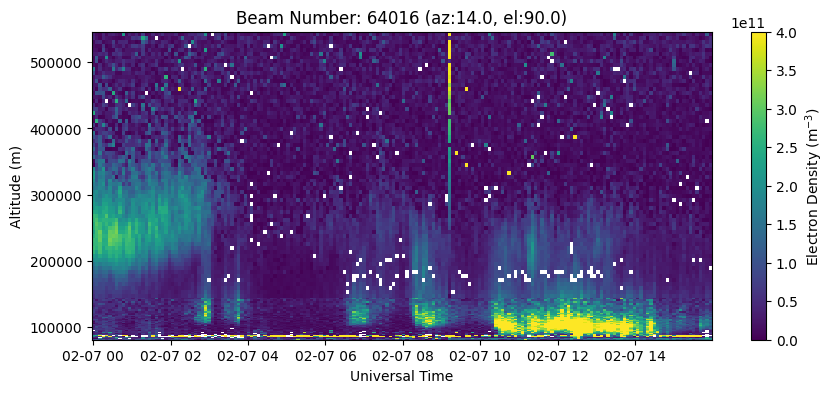

In [3]:
with h5py.File(filename_lp, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    bidx = np.argmax(beamcodes[:,2])
    alt_lp = h5['FittedParams/Altitude'][bidx,:]
    ne_lp = h5['FittedParams/Ne'][:,bidx,:]
    utime_lp = h5['Time/UnixTime'][:,0]

time_lp = utime_lp.astype('datetime64[s]')
ne_lp = ne_lp[:,np.isfinite(alt_lp)]
alt_lp = alt_lp[np.isfinite(alt_lp)]

with h5py.File(filename_ac, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    bidx = np.argmax(beamcodes[:,2])
    alt_ac = h5['FittedParams/Altitude'][bidx,:]
    ne_ac = h5['FittedParams/Ne'][:,bidx,:]
    utime_ac = h5['Time/UnixTime'][:,0]

time_ac = utime_ac.astype('datetime64[s]')
ne_ac = ne_ac[:,np.isfinite(alt_ac)]
alt_ac = alt_ac[np.isfinite(alt_ac)]

cutoff_alt = 150.*1000.
aidx_ac = np.argmin(np.abs(alt_ac-cutoff_alt))
aidx_lp = np.argmin(np.abs(alt_lp-cutoff_alt))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

c = ax.pcolormesh(time_ac, alt_ac[:aidx_ac], ne_ac[:,:aidx_ac].T, vmin=0., vmax=4.e11)
c = ax.pcolormesh(time_lp, alt_lp[aidx_lp:], ne_lp[:,aidx_lp:].T, vmin=0., vmax=4.e11)

ax.set_xlabel('Universal Time')
ax.set_ylabel('Altitude (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamcodes[bidx,0], beamcodes[bidx,1], beamcodes[bidx,2]))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

## Plot all ISR Parameters
Create a figure showing all four ISR parameters (Ne, Ti, Te, Vlos).

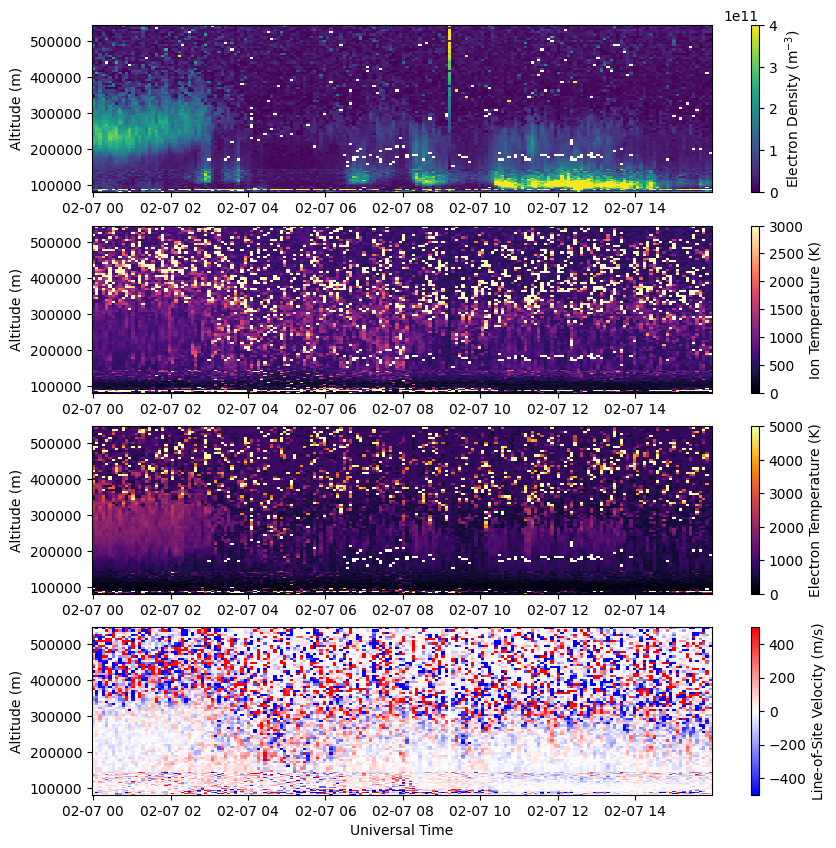

In [4]:
with h5py.File(filename_lp, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    bidx = np.argmax(beamcodes[:,2])
    alt_lp = h5['FittedParams/Altitude'][bidx,:]
    ne_lp = h5['FittedParams/Ne'][:,bidx,:]
    ti_lp = h5['FittedParams/Fits'][:,bidx,:,0,1]
    te_lp = h5['FittedParams/Fits'][:,bidx,:,-1,1]
    vlos_lp = h5['FittedParams/Fits'][:,bidx,:,0,3]
    utime_lp = h5['Time/UnixTime'][:,0]

time_lp = utime_lp.astype('datetime64[s]')
ne_lp = ne_lp[:,np.isfinite(alt_lp)]
ti_lp = ti_lp[:,np.isfinite(alt_lp)]
te_lp = te_lp[:,np.isfinite(alt_lp)]
vlos_lp = vlos_lp[:,np.isfinite(alt_lp)]
alt_lp = alt_lp[np.isfinite(alt_lp)]

with h5py.File(filename_ac, 'r') as h5:
    beamcodes = h5['BeamCodes'][:]
    bidx = np.argmax(beamcodes[:,2])
    alt_ac = h5['FittedParams/Altitude'][bidx,:]
    ne_ac = h5['FittedParams/Ne'][:,bidx,:]
    ti_ac = h5['FittedParams/Fits'][:,bidx,:,0,1]
    te_ac = h5['FittedParams/Fits'][:,bidx,:,-1,1]
    vlos_ac = h5['FittedParams/Fits'][:,bidx,:,0,3]
    utime_ac = h5['Time/UnixTime'][:,0]

time_ac = utime_ac.astype('datetime64[s]')
ne_ac = ne_ac[:,np.isfinite(alt_ac)]
ti_ac = ti_ac[:,np.isfinite(alt_ac)]
te_ac = te_ac[:,np.isfinite(alt_ac)]
vlos_ac = vlos_ac[:,np.isfinite(alt_ac)]
alt_ac = alt_ac[np.isfinite(alt_ac)]

cutoff_alt = 150.*1000.
aidx_ac = np.argmin(np.abs(alt_ac-cutoff_alt))
aidx_lp = np.argmin(np.abs(alt_lp-cutoff_alt))

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(4,1)

# Plot Electron Density
ax = fig.add_subplot(gs[0])
c = ax.pcolormesh(time_ac, alt_ac[:aidx_ac], ne_ac[:,:aidx_ac].T, vmin=0., vmax=4.e11, cmap='viridis')
c = ax.pcolormesh(time_lp, alt_lp[aidx_lp:], ne_lp[:,aidx_lp:].T, vmin=0., vmax=4.e11, cmap='viridis')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Altitude (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

# Plot Ion Temperature
ax = fig.add_subplot(gs[1])
c = ax.pcolormesh(time_ac, alt_ac[:aidx_ac], ti_ac[:,:aidx_ac].T, vmin=0., vmax=3.e3, cmap='magma')
c = ax.pcolormesh(time_lp, alt_lp[aidx_lp:], ti_lp[:,aidx_lp:].T, vmin=0., vmax=3.e3, cmap='magma')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Altitude (m)')
fig.colorbar(c, label=r'Ion Temperature (K)')

# Plot Electron Temperature
ax = fig.add_subplot(gs[2])
c = ax.pcolormesh(time_ac, alt_ac[:aidx_ac], te_ac[:,:aidx_ac].T, vmin=0., vmax=5.e3, cmap='inferno')
c = ax.pcolormesh(time_lp, alt_lp[aidx_lp:], te_lp[:,aidx_lp:].T, vmin=0., vmax=5.e3, cmap='inferno')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Altitude (m)')
fig.colorbar(c, label=r'Electron Temperature (K)')

# Plot Line-of-Site Velocity
ax = fig.add_subplot(gs[3])
c = ax.pcolormesh(time_ac, alt_ac[:aidx_ac], vlos_ac[:,:aidx_ac].T, vmin=-500., vmax=500., cmap='bwr')
c = ax.pcolormesh(time_lp, alt_lp[aidx_lp:], vlos_lp[:,aidx_lp:].T, vmin=-500., vmax=500., cmap='bwr')
ax.set_xlabel('Universal Time')
ax.set_ylabel('Altitude (m)')
fig.colorbar(c, label=r'Line-of-Site Velocity (m/s)')

## Altitude Slice Map
Create a map showing an altitude slice of the FoV at a particular time.  Unlike RTI plots, this will display horizontal variations.  To create a series of plots or animation of how the structures move through the FoV over time, loop over the time index in the plotting portion of this example.

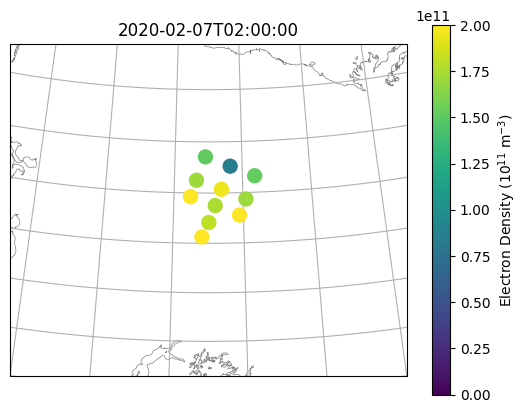

In [5]:
targtime = np.datetime64('2020-02-07T02:00:00')
targalt = 250.

# read in data file
with h5py.File(filename_lp, 'r') as h5:

    # find indicies that occur within the time interval specified
    utime = h5['Time/UnixTime'][:,0]
    
    site_lat = h5['Site/Latitude'][()]
    site_lon = h5['Site/Longitude'][()]

    lat = h5['Geomag/Latitude'][:]
    lon = h5['Geomag/Longitude'][:]
    alt = h5['Geomag/Altitude'][:]

    dens = h5['FittedParams/Ne'][:]

# condence arrays to single altitude slice
aidx = np.nanargmin(np.abs(alt-targalt*1000.),axis=1)
aidx0 = np.array([aidx]).T
slice_lat = np.take_along_axis(lat, aidx0, axis=1)
slice_lon = np.take_along_axis(lon, aidx0, axis=1)
# density must be handled slightly differently to account for the time dimension
aidx1 = np.array([[aidx]]).transpose(0,2,1)
slice_dens = np.take_along_axis(dens, aidx1, axis=2)

# find index of target time for plottin
tidx = np.argmin(np.abs(targtime.astype(int)-utime))

# create plots
fig = plt.figure()
map_proj = ccrs.LambertConformal(central_latitude=site_lat, central_longitude=site_lon)
ax = plt.subplot(111,projection=map_proj)
ax.coastlines(color='grey', linewidth=0.5)
ax.gridlines()
ax.set_extent((-160., -135., 60., 70.))
ax.set_title(targtime)

# plot RISR
amisr = ax.scatter(slice_lon, slice_lat, c=slice_dens[tidx], s=100, vmin=0.e11, vmax=2.e11, zorder=3, transform=ccrs.Geodetic())

cbar = plt.colorbar(amisr)
cbar.set_label(r'Electron Density (10$^{11}$ m$^{-3}$)')
